# Team Ares -- Task 2 Report -- Fall 2020
## Contributions:
### Cody Shearer
- Created approach for task 2 and broke it down into managable steps.
- Created script for generating training/testing data 
- Generated training/testing data
- Wrote report section on generating training/testing data
- Wrote code for generating loss plot
- Managed team repository.
- Organized team meetings.

### Zhymir Thompson
- Created script to generate and save reshaped training/testing data
- Created models to use train/testing data
- Created script to train model and save results
- Created script to parse history object dictionary for data to plot (currently plots loss and accuracy)

### Mahmudul Hasan
### Vincent Davidson

___

## Informal Breakdown of Our Approach
I've broken task 2 down into three steps. The first is to create some training data, from which we can learn an ensemble strategy. The second is to select a learning model, then train and test variations of that model. The third is to summarize our results and approach in the report. Throughout the entire process and for each step you complete, write down a summary of what you did and what you learned (where necessary). This will save us a lot of time when writing the report. Also, keep a high-level list of contributions you make to the task; it is your responsiblity to make sure you get credit for your work.

1. generate training/test data from Athena as (X,Y), where:
  1. X is a set of predictions from athena
    1. I'm thinking we use the adversarial examples provided in the /data/ folder. This will require understanding how the AEs are stored in the .npy files. 
    2. Once we understand how to use the AEs from the .npy files, we should select a subset of them, ensuring we do not introduce bias into our model by using too many of any one type of AE. We may even decide to include some benign samples in the mix of training/testing data. Whatever we use, let's *be sure to use equal amounts of AEs from each attack type*.
  2. Y is a set of true labels that matches with our selected AEs
    1. We should find out how to get predictions from a weak defense(WD) (see below table for an example of what I mean).
    2. We then need to select a set of WDs (or just use all of 72 of them) to create training data

Once we are done with this first part, we should have data that looks something like this table

| AE_id | WD1                   | WD2                   | ... | Y   |
|-------|-----------------------|-----------------------|-----|-----|
| 1     | [0.1,0.4,0,0,...,0.1] | [0.1,0,0.8,0,...,0.1] | ... | 3   |
| 2     | [0.6,0,0,0.3,...,0.1] | [0,0,0.3,0.1,...,0.2] | ... | 1   |
| ...   | ....                  | ...                   | ... | ... |
| n     | [0.1,0.4,0,0,...,0.1] | [0.1,0,0.8,0,...,0.1] | ... | 9   |

where:
- where AE_id is just an index we associate with the training sample
- WD# is the nth weak defense we choose to use
- predictions from the weak defenses (e.g [0.1,0.4,0,0,...,0.1]) are a probability distribution from 0 through 9, where the WD assigns a probability (makes a prediction) that a particular number is the true label.
- Y is the true (correct) label for that AE or benign sample

2. Learn an ensemble strategy
  1. We need to select a ML model for learning. Logistic regression is the most basic form of categorical predicion model, but we could also use some type of decision tree. Whatever we use, let's stick to that one model.
  2. We should then decide what metrics we wish to track during training and find out how to do this with Keras. We must at the very least track model accuracy (loss) over time.
    1. Run through [these tutorials](https://www.tensorflow.org/tutorials) (no setup required, tutorials can be run in google collab).
    2. Once you've finished some of the basic tutorials (it's up to you to figure out how much you will need), figure out how to track model loss (accuracy) over each training iteration for one of the example models you create. Figure out how to save this and any other metrics you use to a csv file, where each row is a training step and each column is a metric (like model loss). In addition, figure out how to plot the data in the csv.
  2. Whatever model we select, train a few (3 to 5) variations of the ML model by changing the hyper-parameters that we could use for that model. Note that this selection of variations won't occur simultaneously. Note also that we should separate the data we generated in step 1 into a training and a testing set. How we separate this (e.g. 80% training 20% testing) might depend on the model we choose.
    1. Select a set of hyper-parameters
    2. Train the model with that selection of hyper-parameters, tracking the model loss (and any other selected metrics) over each training iteration. You will store these metrics in a csv file, where each row is a training step and each column is a metric (like model loss).
    3. As you train the model, print the model loss after every iteration. A succesful hyper-parameter selection will result in the model loss decreasing after each training step. If it doesn't decrease or stops decreasing, stop the training. Either the selection of hyper-parameters is bad and your loss won't converge, or your model has already converged and further training won't help. 
    3. After your model has converged, plot the resulting metrics.
    4. Save the plots, the learned weights/training parameters, and the metrics you tracked during training. Please name these intelligently (include the name of the model, and any relevant hyper-parameters in the file name), any member of the group should be able to understand what the contents of the file are without opening them.
    5. Place the files in their respective folders in Task2/. If a file doesn't appear to fit in any folder, ask in the discord chat where to put it.
    6. Repeat the above steps another 2 to 4 times, [adjusting the hyper-parameters you select](https://towardsdatascience.com/guide-to-choosing-hyperparameters-for-your-neural-networks-38244e87dafe). Selection of these hyper-parameters is uncertain, so you will need to use any knowledge and experience you have to adjust these, based on the results you get. 
3. Write the report. This should detail your approaches, results, what you learned, conclusions, etc. Imagine telling yourself what you wish you knew before starting the task. If you kept a summary of what you did and what you learned (as I suggested from the beginning) this should be easy.
  1. Introduce the approaches that are used in the task.
  2. Experimental settings --- the values of the tunable parameters for each variant.
  3. Evaluation and necessary analysis.
  4. Contribution of individual team members.
  5. Citations to all related works.
  
## Generating Training and Testing Data
We collected raw predictions as logits from 19 sets of 10k MNIST images run through 16 weak defenses using `src/scripts/cody_scripts/generate_test_data.py` and saved them at . 
  
While the original plan was to collect raw predicitons as logits from 73 models (the original CNN plus the 72 weak defenses from `/src/configs/demo/athena-mnist.json`) and all 45 sets of images (the original MNIST dataset, along with 44 adversarial examples from `/src/configs/demo/data-mnist.json`), the predictions from one model for one set of 10k images comes to ~35MB, so 73 models x 45 MNIST sets x 35MB = 114.975GB. This wasn't feasible, so we selected a representative sample of weak defenses and adversarial examples, where we have 16 cnn models x 19 MNIST sets x 35MB = 10.64GB. This was further compressed with numpy's `savez_compressed` function within the `src/scripts/cody_scripts/generate_test_data.py` script, bringing the saved predictions at `Task2/data/predictions.npz` down to ~126MB. As github has a maximum file size limit of 100MB, we use 7-zip to store the predicitions in 3 parts.
  
### Weak Defenses
Our selection of weak defenses used to generate the predictions includes one model for each "type" of weak defense found in `/src/configs/task2/cody_configs/athena-mnist.json` (also available as a set of "active_wds"): 
  - model-mnist-cnn-clean.h5
  - model-mnist-cnn-rotate90.h5
  - model-mnist-cnn-shift_left.h5
  - model-mnist-cnn-flip_horizontal.h5
  - model-mnist-cnn-affine_vertical_compress.h5
  - model-mnist-cnn-morph_erosion.h5
  - model-mnist-cnn-augment_samplewise_std_norm.h5
  - model-mnist-cnn-cartoon_mean_type1.h5
  - model-mnist-cnn-quant_4_clusters.h5
  - model-mnist-cnn-distort_x.h5
  - model-mnist-cnn-noise_gaussian.h5
  - model-mnist-cnn-filter_sobel.h5
  - model-mnist-cnn-compress_jpeg_quality_80.h5
  - model-mnist-cnn-denoise_tv_chambolle.h5
  - model-mnist-cnn-geo_swirl.h5
  - model-mnist-cnn-seg_gradient.h5
  
### Adversarial (and clean) Examples
Our selection of samples includes the original MNIST dataset, along with two sets of samples per "type" of transformation found in `/src/configs/demo/data-mnist.json`. For each transformation, we select the two sets of AEs that are the most different. You can find the following at `/src/configs/task2/cody_configs/data-mnist.json`:
  - test_BS-mnist-clean.npy
  - test_AE-mnist-cnn-clean-fgsm_eps0.1.npy
  - test_AE-mnist-cnn-clean-fgsm_eps0.3.npy
  - test_AE-mnist-cnn-clean-bim_ord2_eps0.75.npy
  - test_AE-mnist-cnn-clean-bim_ord2_eps1.2.npy
  - test_AE-mnist-cnn-clean-bim_ordinf_eps0.075.npy
  - test_AE-mnist-cnn-clean-bim_ordinf_eps0.12.npy
  - test_AE-mnist-cnn-clean-cw_l2_lr0.0098.npy
  - test_AE-mnist-cnn-clean-cw_l2_lr0.018.npy
  - test_AE-mnist-cnn-clean-deepfool_l2_overshoot3.npy
  - test_AE-mnist-cnn-clean-deepfool_l2_overshoot50.npy
  - test_AE-mnist-cnn-clean-jsma_theta0.15_gamma0.5.npy
  - test_AE-mnist-cnn-clean-jsma_theta0.25_gamma0.5.npy
  - test_AE-mnist-cnn-clean-pgd_eps0.075.npy
  - test_AE-mnist-cnn-clean-pgd_eps0.11.npy
  - test_AE-mnist-cnn-clean-mim_eps0.06.npy
  - test_AE-mnist-cnn-clean-mim_eps0.1.npy
  - test_AE-mnist-cnn-clean-onepixel_pxCount15.npy
  - test_AE-mnist-cnn-clean-onepixel_pxCount75.npy
  
## Model Training Steps
  
### Training/Test Data
Current location: src/scripts/zhymir_scripts/train_test
  
  - test_data
  - test_labels
  - train_data*
  - train_labels
  
\* All data needs to be unzipped for use and zipped before upload
  
\* train_data is too big to be on github so needs to be split across zip files and unzipped as one file
  
### Training steps
#### General Steps
  * load training data (train_data, train_labels)
  * ~~Create Ensemble~~ Training_data is composed of Ensemble results
  * Create model:
      * model takes input from Ensemble and outputs number from 0-9
  * ~~Feed images through Ensemble and train model on output~~ Train model on train_data and train_labels
  
#### Detailed steps
  * train_data = np.load([location of train_data])
  * train_labels = np.load([location of train_labels])
  * Create model (see tensorflow tutorial, task2.py, task2_load_from_data.py for help):
      * input_shape = (# classifiers, 10)
      * Flatten for ease of training
      * output is size 10
  * model.compile (tensorflow tutorial, keras loss, keras optimizer):
      * define optimizer and loss for model
  * train model:
      * epochs = 10, validation_split = 0.1
  * save model -> model.save([path/filename])

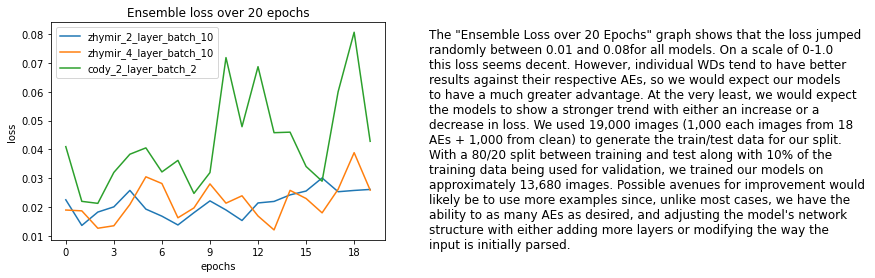

In [28]:
# add src directory to python path
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils.file import load_from_json

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
# set x-axis to be integer
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# matplotlib bg color setting
plt.rcParams['axes.facecolor'] = 'white'

# caption by zhymir
txt = """The "Ensemble Loss over 20 Epochs" graph shows that the loss jumped
randomly between 0.01 and 0.08for all models. On a scale of 0-1.0
this loss seems decent. However, individual WDs tend to have better
results against their respective AEs, so we would expect our models
to have a much greater advantage. At the very least, we would expect
the models to show a stronger trend with either an increase or a 
decrease in loss. We used 19,000 images (1,000 each images from 18 
AEs + 1,000 from clean) to generate the train/test data for our split.
With a 80/20 split between training and test along with 10% of the 
training data being used for validation, we trained our models on 
approximately 13,680 images. Possible avenues for improvement would 
likely be to use more examples since, unlike most cases, we have the
ability to as many AEs as desired, and adjusting the model's network
structure with either adding more layers or modifying the way the
input is initially parsed.
"""

#### plot current model validation histories:
zhymir_2_layer_history = load_from_json('./data/zhymir_model_2_layer_history')
zhymir_4_layer_history = load_from_json('./data/zhymir_model_4_layer_history')
cody_2_layer_batch_2 = load_from_json('./data/cody_model_2_layer_batch_2_history')
plt.plot(zhymir_2_layer_history['val_loss'])
plt.plot(zhymir_4_layer_history['val_loss'])
plt.plot(cody_2_layer_batch_2['val_loss'])
plt.title('Ensemble loss over 20 epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['zhymir_2_layer_batch_10','zhymir_4_layer_batch_10', 'cody_2_layer_batch_2'], loc='upper left')
plt.figtext(1, 0.05, txt, wrap=True, fontsize=12)
plt.show()

In [13]:
from keras import models
model = models.load_model('models/cody_model_2_layer_batch_2.h5')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D1 (Dense)                   (None, 16, 100)           1100      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                16010     
Total params: 17,110
Trainable params: 17,110
Non-trainable params: 0
_________________________________________________________________
None
